In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import collections

In [4]:
reviews = pd.read_csv('cleaned.csv', index_col = 0)

In [5]:
df = reviews.copy()

In [80]:
print(df[df.date.isnull()==True]) # none of the dates are NA
print(df.dtypes)
print(df.shape)

Empty DataFrame
Columns: [company, title, name, position, industry, usage, paid_status, source, date, total, ease, feature, support, value, recommend, comments, pros, cons, overall, recommendations to other buyers, employees]
Index: []

[0 rows x 21 columns]
company                             object
title                               object
name                                object
position                            object
industry                            object
usage                               object
paid_status                         object
source                              object
date                                object
total                                int64
ease                               float64
feature                            float64
support                            float64
value                              float64
recommend                          float64
comments                            object
pros                                object
cons      

In [213]:
df.isnull().sum()

company                               0
title                                 5
name                                  0
position                            731
industry                           2393
usage                              2735
paid_status                         300
source                               64
date                                  0
total                                 0
ease                                  2
feature                             164
support                              35
value                               322
recommend                           278
comments                           4663
pros                               1174
cons                               1342
overall                            3514
recommendations to other buyers    6012
employees                          3250
dtype: int64

In [81]:
df['source'].value_counts()

Capterra           5644
Software Advice     650
GetApp               87
Name: source, dtype: int64

In [10]:
# tipsGrid = sns.FacetGrid(df, row='date', col='overall', hue='company', palette="Set2")
# tipsGrid.map(sns.regplot,'date','overall')
# tipsGrid.add_legend()

In [82]:
df.head()

,company,title,name,position,industry,usage,paid_status,source,date,total,...,feature,support,value,recommend,comments,pros,cons,overall,recommendations to other buyers,employees
0,tix,Tix Cares! *Best ticketing Company...Bar none.,Beatriz B.,Marketing Coordinator,Gambling & Casinos,2+ years,NO,Capterra,2019-02-20,5,...,5.0,5.0,5.0,10.0,NaN,Customer service is the BEST! No words can des...,Not many people know about Tix. If more people...,"I had no background on ticketing systems, Tix ...",NaN,1001-5000
1,tix,"Couldn't be more pleased with Tix, Inc.'s web ...",Carleton U.,Treasurer,NaN,NaN,NO,Capterra,2016-04-04,5,...,5.0,5.0,5.0,10.0,After much research into the various vendors f...,NaN,NaN,NaN,NaN,NaN
2,tix,TIX is the answer we needed--Great support and...,Jennifer E.,Data Systems Coordinator,Religious Institutions,Less than 6 months,NO,Capterra,2016-10-13,5,...,5.0,5.0,5.0,10.0,NaN,Patron experience is excellent. Help library i...,Sometimes the reports do not output to excel c...,We wanted an easy-to-use system where patrons ...,NaN,51-200
3,tix,The Excellent Customer Service has made workin...,Rita A.,Box Office Manager,NaN,NaN,NO,Capterra,2016-05-04,4,...,5.0,5.0,5.0,10.0,I have worked with these people and this syste...,NaN,NaN,NaN,NaN,NaN
4,tix,Great ticket company and excellent customer se...,Alan G.,Box Office Manager,NaN,NaN,NO,Capterra,2016-04-22,5,...,5.0,5.0,5.0,10.0,PROS-\n\n-24/7 support and customer service\n\...,NaN,NaN,NaN,NaN,NaN


In [83]:
print(df['company'].unique().size)
a = df.company.value_counts()
a[a > 100]

87


eventbrite              1902
eventix                  777
ticketsource             308
silent_auction_pro       273
sap_event_ticketing      221
ticket_tailor            181
thundertix               168
purplepass_ticketing     151
tix                      138
picatic                  127
repairshopr              108
Name: company, dtype: int64

In [22]:
df_100 = df.groupby('company').filter(lambda x: x.company.value_counts() > 100)
df_100

,company,title,name,position,industry,usage,paid_status,source,date,total,...,feature,support,value,recommend,comments,pros,cons,overall,recommendations to other buyers,employees
0,tix,Tix Cares! *Best ticketing Company...Bar none.,Beatriz B.,Marketing Coordinator,Gambling & Casinos,2+ years,NO,Capterra,2019-02-20,5,...,5.0,5.0,5.0,10.0,NaN,Customer service is the BEST! No words can des...,Not many people know about Tix. If more people...,"I had no background on ticketing systems, Tix ...",NaN,1001-5000
1,tix,"Couldn't be more pleased with Tix, Inc.'s web ...",Carleton U.,Treasurer,NaN,NaN,NO,Capterra,2016-04-04,5,...,5.0,5.0,5.0,10.0,After much research into the various vendors f...,NaN,NaN,NaN,NaN,NaN
2,tix,TIX is the answer we needed--Great support and...,Jennifer E.,Data Systems Coordinator,Religious Institutions,Less than 6 months,NO,Capterra,2016-10-13,5,...,5.0,5.0,5.0,10.0,NaN,Patron experience is excellent. Help library i...,Sometimes the reports do not output to excel c...,We wanted an easy-to-use system where patrons ...,NaN,51-200
3,tix,The Excellent Customer Service has made workin...,Rita A.,Box Office Manager,NaN,NaN,NO,Capterra,2016-05-04,4,...,5.0,5.0,5.0,10.0,I have worked with these people and this syste...,NaN,NaN,NaN,NaN,NaN
4,tix,Great ticket company and excellent customer se...,Alan G.,Box Office Manager,NaN,NaN,NO,Capterra,2016-04-22,5,...,5.0,5.0,5.0,10.0,PROS-\n\n-24/7 support and customer service\n\...,NaN,NaN,NaN,NaN,NaN
5,tix,"Simple, Great Customer Service that is always ...",AJ M.,Operations Manager,Sports,2+ years,NO,Capterra,2018-06-06,5,...,5.0,5.0,5.0,9.0,NaN,It is a simple program to use. Easy Setup even...,Lack of social media connection. Lack of infor...,Selling tickets 24-7,NaN,11-50
6,tix,Best choice for the price,Jim N.,Direcotr,NaN,2+ years,NO,Capterra,2017-12-05,5,...,5.0,5.0,5.0,9.0,NaN,Online seat selection ordering is very efficie...,"Customer data maintenance is a bit lean, sorti...",NaN,NaN,NaN
7,tix,"A well layed-out system overall, with great po...",David E.,Supervisor,NaN,NaN,NO,Capterra,2015-09-29,4,...,5.0,4.0,5.0,9.0,Pros: The system is mostly user friendly on th...,NaN,NaN,NaN,NaN,NaN
8,tix,Love this program.,Donna F.,Executive assistant,NaN,2+ years,NO,Capterra,2018-06-07,5,...,5.0,5.0,5.0,9.0,NaN,Customizable for our events and being able to ...,Would like more ticket printer choices. Would ...,NaN,NaN,NaN
9,tix,Annual June Dance Performances,Janice B.,Owner/Artistic Director,NaN,2+ years,NO,Capterra,2016-06-17,5,...,5.0,5.0,4.0,9.0,NaN,Ease of ticket sales. Nice reports to confirm ...,Since I only use the program once every 6 mont...,Thanks to Steve for helping me navigate the pr...,NaN,NaN


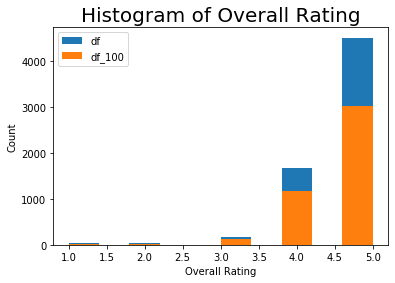

In [191]:
plt.hist(df['total'])
plt.hist(df_100['total'])
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.title('Histogram of Overall Rating', fontsize=20)
plt.gca().legend(('df','df_100'))

Text(0.5, 1.0, 'Overall Rating Time Series - Eventbrite')

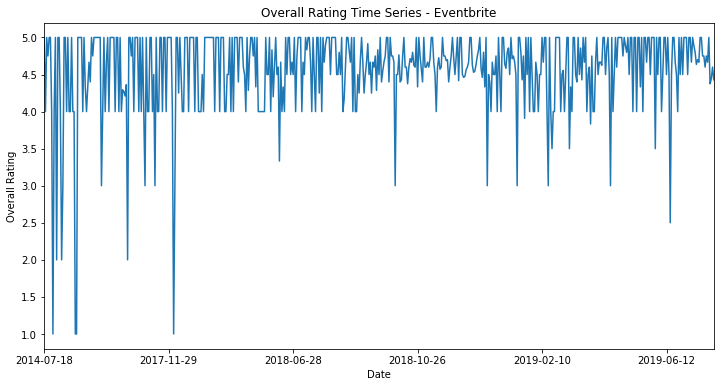

In [176]:
plt.figure(figsize=(12,6))
df_eventbrite = df.loc[df['company'] == 'eventbrite']

df_eventbrite.dropna(subset=['total']).groupby('date').total.mean().plot()
plt.xlabel('Date')
plt.ylabel('Overall Rating')
plt.title('Overall Rating Time Series - Eventbrite')


Text(0.5, 1.0, 'Overall Rating Time Series - Eventix')

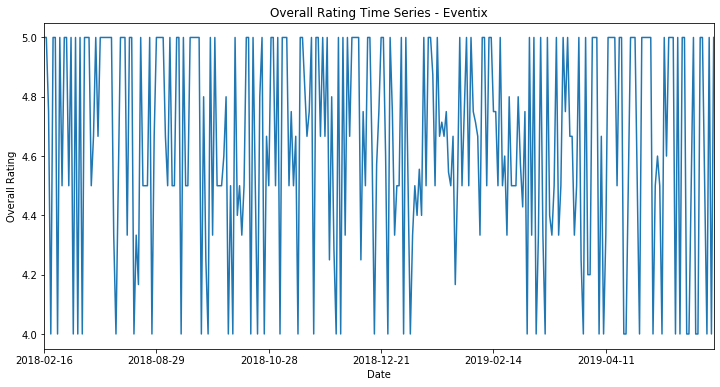

In [177]:
plt.figure(figsize=(12,6))
df_eventix = df.loc[df['company'] == 'eventix']

df_eventix.dropna(subset=['total']).groupby('date').total.mean().plot()
plt.xlabel('Date')
plt.ylabel('Overall Rating')
plt.title('Overall Rating Time Series - Eventix')

In [13]:
df_3 = df.groupby('company').filter(lambda x: x.company.value_counts() > 300)
df_3['paid_status'] = df.paid_status.fillna('')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


TypeError: unsupported operand type(s) for /: 'str' and 'int'

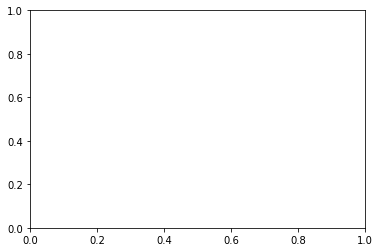

In [18]:
# Sort the dataframe by target
target_0 = df_3.loc[df_3['company'] == 'eventbrite']
target_1 = df_3.loc[df_3['company'] == 'eventix']
target_2 = df_3.loc[df_3['company'] == 'ticketsource']

sns.distplot(target_0[['paid_status']], hist=True, rug=True)
sns.distplot(target_1[['paid_status']], hist=True, rug=True)
sns.distplot(target_2[['paid_status']], hist=True, rug=True)

sns.plt.show()

Text(0.5, 1.0, 'Distribution Plot of Paid Status for Companies with over 100 Reviews')

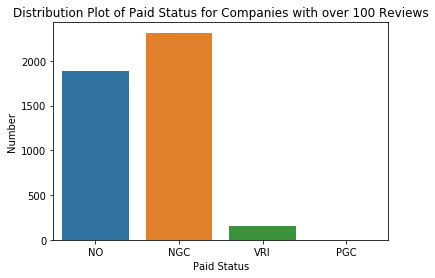

In [24]:
sns.countplot(df_100['paid_status'])
plt.xlabel('Paid Status')
plt.ylabel('Number')
plt.title('Distribution Plot of Paid Status for Companies with over 100 Reviews')

No handles with labels found to put in legend.


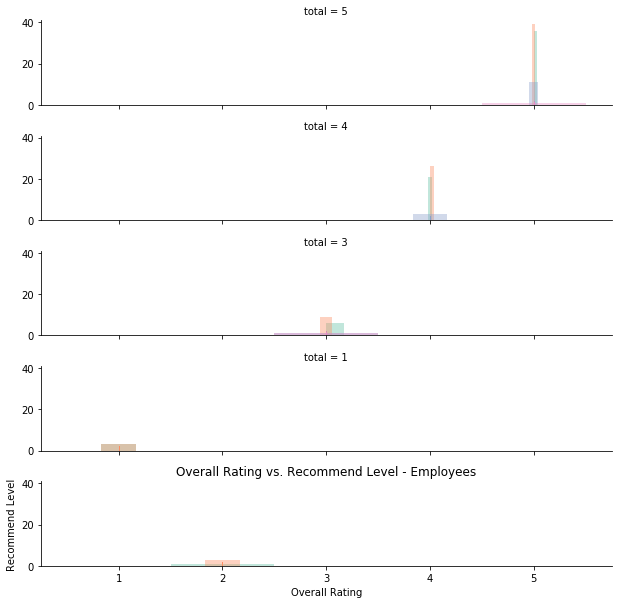

In [210]:
# sns.lmplot("total", "recommend", df_100, hue="paid_status", palette="Set2")
# sns.distplot(df['total'], hue = 'paid_status', palette="Set2")
ordered_total = df_100.total.value_counts().index
total_grid = sns.FacetGrid(df_100, row='total', hue="paid_status",
                           palette="Set2", row_order=ordered_total,
                           height=1.7, aspect=5,)
# total_grid.map(sns.distplot, "total")
total_grid.map(sns.distplot, "total", rug=True)

plt.xlabel('Overall Rating')
plt.ylabel('Recommend Level')
plt.title('Overall Rating vs. Recommend Level - Employees')
ax.legend()

In [110]:
# plt.figure(figsize=(12,6))
# sns.catplot(x="feature", y="recommend", hue="employees",
#             kind="violin", data=df_100);

Text(0.5, 1.0, 'Median Overall Rating for Each Company')

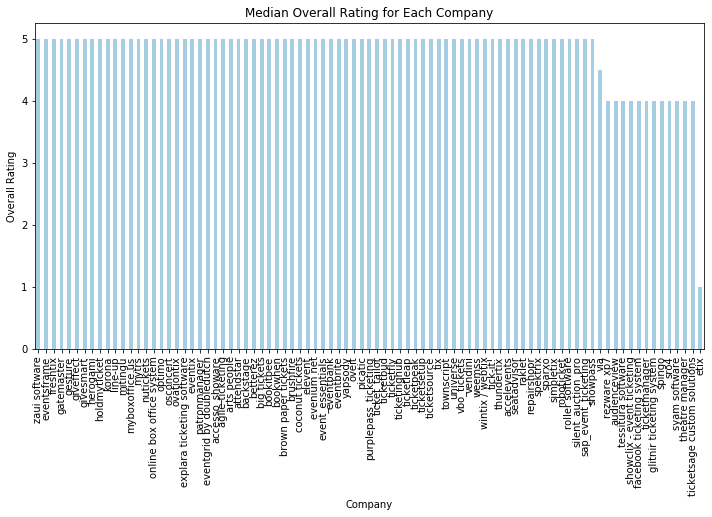

In [181]:
plt.figure(figsize=(12,6))
df.groupby('company')['total'].median().sort_values(ascending=False).plot.bar(colormap='Paired')
plt.xlabel('Company')
plt.ylabel('Overall Rating')
plt.title('Median Overall Rating for Each Company')

In [21]:
df_agg = df_100.groupby('company').agg({'total':'mean','recommend':'mean'})
df_agg.sort_values(ascending=False, by='recommend').plot(kind='bar',y='recommend', colormap='Paired')
plt.xlabel('Company with over 100 Reviews')
plt.ylabel('Recommendation Level')
plt.title('Recommendation Level for Companies with over 100 Reviews')

NameError: name 'df_100' is not defined

Text(0.5, 1.0, 'Distribution Plot of Recommendation Levels for Companies with over 100 Reviews')

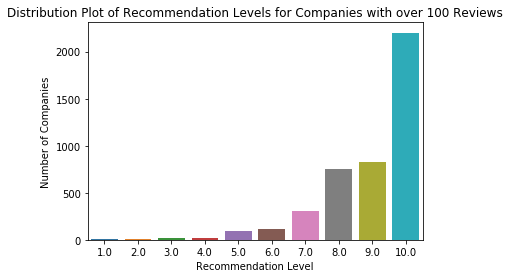

In [214]:
sns.countplot(df_100['recommend'])
plt.xlabel('Recommendation Level')
plt.ylabel('Number of Recommendations')
plt.title('Distribution Plot of Recommendation Levels for Companies with over 100 Reviews')

Text(0.5, 1.0, 'Distribution Plot of Recommendation Levels for Companies with over 100 Reviews')

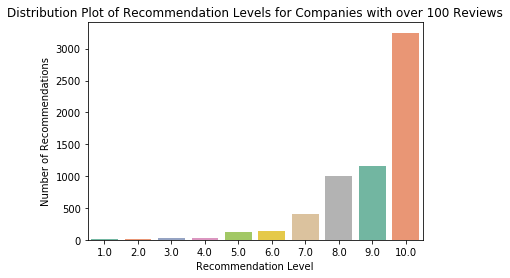

In [216]:
sns.countplot(df['recommend'], palette = "Set2")
plt.xlabel('Recommendation Level')
plt.ylabel('Number of Recommendations')
plt.title('Distribution Plot of Recommendation Levels for Companies with over 100 Reviews')

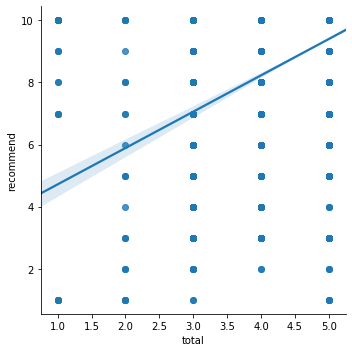

In [96]:
sns.lmplot("total", "recommend", df)

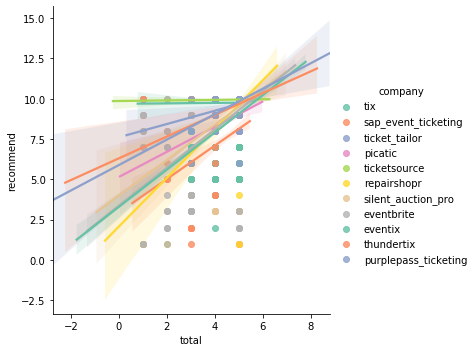

In [100]:
sns.lmplot("total", "recommend", df_100, hue="company", palette="Set2")

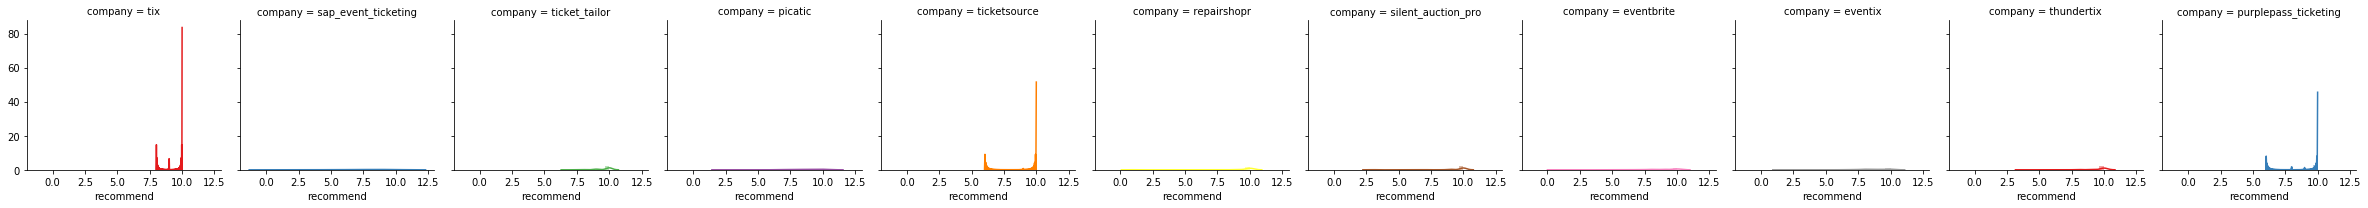

In [98]:
SexGrid = sns.FacetGrid(df_100, col='company', hue="company", palette="Set1")
SexGrid.map(sns.distplot, "recommend")